In [7]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
token_df = pd.read_csv('token_dataframe.csv')

token_df

,timeStamp,hash,from,contractAddress,to,tokenName,tokenSymbol,value,dextools_volume5m,dextools_sellVolume5m,...,variationChain6h,price24h,priceChain24h,volume24h,sells24h,buys24h,sellVolume24h,buyVolume24h,variation24h,variationChain24h
0,2024-11-27 00:25:36,0xed7a8f57b5be7ad6c92d31b206b3294e5ccc47f9b1e6...,0x9008d19f58aabd9ed0d60971565aa8510560ab41,0x886ee721ef034026be078122fa55ab88c07907be,0x6b411100c72ba2445e50ffd20839c28b3546de7c,Tardar Neko,TARDAR,16380062016205800637,0.0,0.0,...,0.000000,3.485853e-07,1.017728e-10,0.0,0,0,0,0,0.000000,0.000000
1,2024-11-27 03:41:52,0xacdf806c252831cd1ed71e51cb11d59cbda4f12cbcde...,0x967ccb4ea7b8a3e6bcef26a2d1bed1be5e590e3f,0x42069f08b5a8736f59948f0ab6a833d1bea23225,0x6b411100c72ba2445e50ffd20839c28b3546de7c,Meme Run,MEMER,4206900000000000000,0.0,0.0,...,6.742760,2.579088e-08,7.529892e-12,0.0,0,0,0,0,-33.898372,-37.122029
2,2024-11-27 04:56:32,0xc5d82b103e54e897058c9396e1295e795b5cd2865c66...,0x12099b7b787d247cca2055bccaf00e6448084216,0x53dac5b23b3ca9a3c86aff8d0c7110fba72a9783,0x6b411100c72ba2445e50ffd20839c28b3546de7c,Peanuts Brother,Wally,99987800000000000000,0.0,0.0,...,6.113540,1.558844e-04,4.565779e-08,0.0,0,0,0,0,96.191967,84.453369
3,2024-11-27 17:38:08,0x8a6c661b394c1b0f73f0bedf6dc8a91de300a6e00e2c...,0xeb725eea242f266db11c5e32a18d6f9657b1d857,0xa97705e891a1eb7085e1c8991ad55fbd5f6ef5ca,0x6b411100c72ba2445e50ffd20839c28b3546de7c,NASDANK,DANK,3000000000000000000000000000,0.0,0.0,...,17.937394,4.173929e-08,1.172361e-11,0.0,0,0,0,0,1334.791123,1323.786204
4,2024-11-27 23:55:44,0x881f5fdd60171598c40f6e0f6ff16867c152a0c0fad7...,0xd335f57ca647e21d7a5a0768934c1542d4fbd3f0,0xb09b5bbcbab0fb79fcbaa67643fe0d6af65bca01,0x6b411100c72ba2445e50ffd20839c28b3546de7c,Smart Money Flow,FLOW,35000000000000000000,0.0,0.0,...,1.689385,3.921291e-06,1.068851e-09,0.0,0,0,0,0,3036.846362,3068.687445
5,2024-11-27 23:55:44,0xf9aba821a466eb324d113d376414a0adaf598f8d80ec...,0xd335f57ca647e21d7a5a0768934c1542d4fbd3f0,0xb09b5bbcbab0fb79fcbaa67643fe0d6af65bca01,0x6b411100c72ba2445e50ffd20839c28b3546de7c,Smart Money Flow,FLOW,35000000000000000000,0.0,0.0,...,1.689385,3.921291e-06,1.068851e-09,0.0,0,0,0,0,3036.846362,3068.687445
6,2024-11-28 00:02:08,0x12a3f8f1e13ee2c2a44f6fe05d8a4bf27f5d907f38ab...,0xd335f57ca647e21d7a5a0768934c1542d4fbd3f0,0xb09b5bbcbab0fb79fcbaa67643fe0d6af65bca01,0x6b411100c72ba2445e50ffd20839c28b3546de7c,Smart Money Flow,FLOW,35000000000000000000,0.0,0.0,...,1.689385,3.921291e-06,1.068851e-09,0.0,0,0,0,0,3036.846362,3068.687445
7,2024-11-28 00:02:08,0xcb5d3ba0c78c6b1d59337662a57f4d241e916af49067...,0xd335f57ca647e21d7a5a0768934c1542d4fbd3f0,0xb09b5bbcbab0fb79fcbaa67643fe0d6af65bca01,0x6b411100c72ba2445e50ffd20839c28b3546de7c,Smart Money Flow,FLOW,35000000000000000000,0.0,0.0,...,1.689385,3.921291e-06,1.068851e-09,0.0,0,0,0,0,3036.846362,3068.687445
8,2024-11-28 00:42:40,0x502db6350cbe4337e34ba83546661225ecefdc1faec1...,0x6b82284a0cdb7549c002bad6b639fa3c50d37bb5,0x8475ec8b519025548c2417b82aa25bf58cd72b39,0x6b411100c72ba2445e50ffd20839c28b3546de7c,Dogmon,DOGMON,8500000000000000000,0.0,0.0,...,8.331039,5.274749e-05,1.545103e-08,0.0,0,0,0,0,42.795761,34.386288
9,2024-11-28 00:51:12,0x658189ef3bb7837a076e455375134c36c05ca49f7c31...,0x12099b7b787d247cca2055bccaf00e6448084216,0x53dac5b23b3ca9a3c86aff8d0c7110fba72a9783,0x6b411100c72ba2445e50ffd20839c28b3546de7c,Peanuts Brother,Wally,6900000000000000000,0.0,0.0,...,6.113540,1.558844e-04,4.565779e-08,0.0,0,0,0,0,96.191967,84.453369


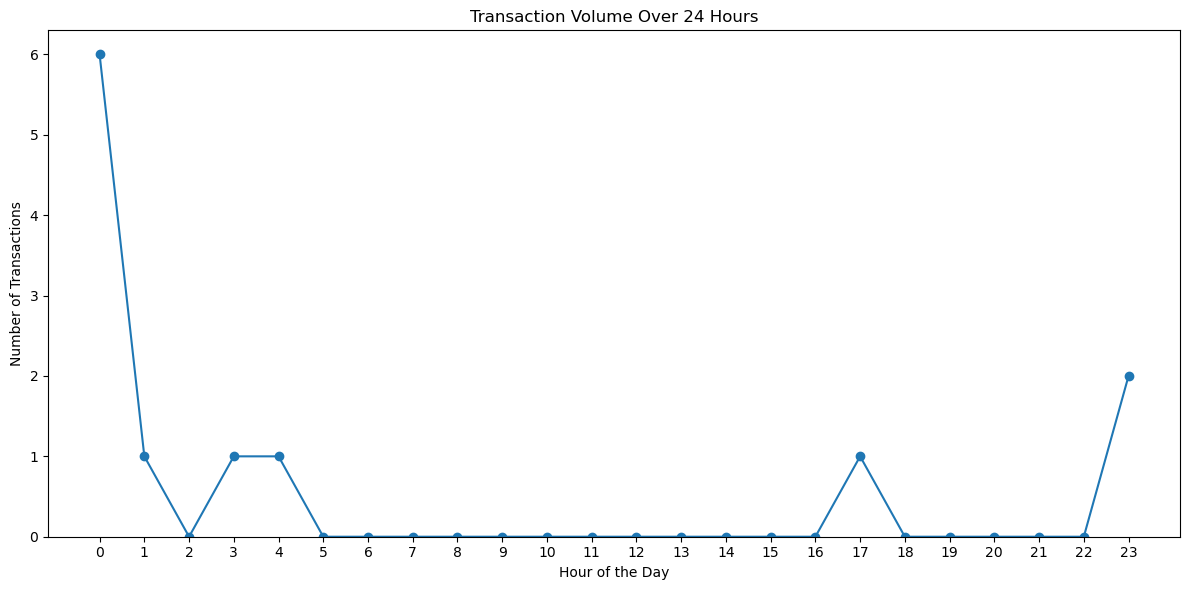

In [9]:
# Data Visualization
plt.figure(figsize=(12, 6))

# Visualizing transaction volume over time if timeStamp exists
if "timeStamp" in token_df.columns:
    token_df['timeStamp'] = pd.to_datetime(token_df['timeStamp'])
    token_df['hour'] = token_df['timeStamp'].dt.hour
    transaction_volume = token_df.groupby('hour').size()
    
    # Create a new series with zeros and update with transaction volumes
    hours = range(24)
    volume_with_zeros = pd.Series(0, index=hours)
    volume_with_zeros.update(transaction_volume)
    
    plt.plot(volume_with_zeros.index, volume_with_zeros.values, marker='o')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Transactions')
    plt.title('Transaction Volume Over 24 Hours')
    plt.xticks(range(0, 24))
    plt.ylim(bottom=0)  # Set the baseline of the y-axis to 0
    plt.tight_layout()
    plt.show()


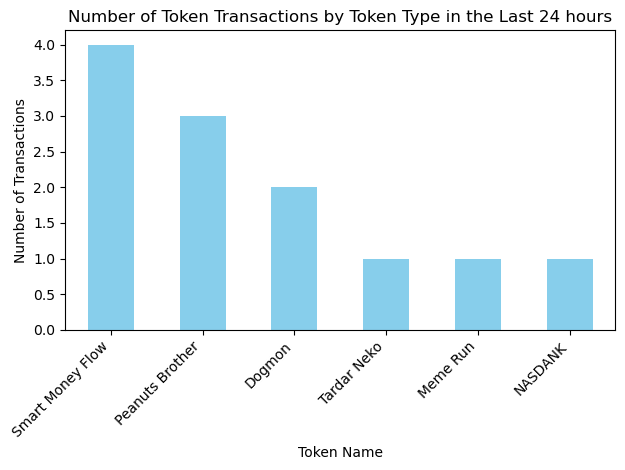

In [10]:
# Visualizing the number of token transactions by token type
token_counts = token_df["tokenName"].value_counts()
token_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Token Name')
plt.ylabel('Number of Transactions')
plt.title('Number of Token Transactions by Token Type in the Last 24 hours')
plt.xticks(rotation=45, ha='right')  # Adjust label alignment for readability
plt.tight_layout()
plt.show()


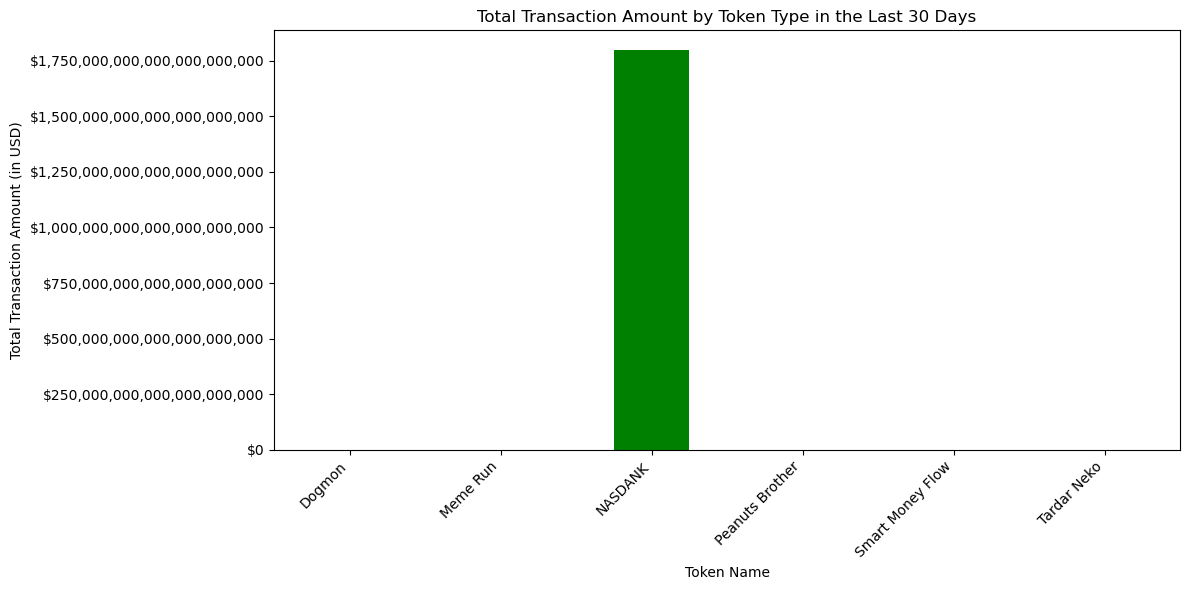

In [12]:
# Data Visualization: Transaction Amounts in USD
plt.figure(figsize=(12, 6))

# Calculating the total amount of USD of transactions by multiplying value and price
token_df['transaction_usd'] = token_df['value'].astype(float) * token_df['price'].astype(float)

# Aggregating transaction USD values by token type
token_value_agg_usd = token_df.groupby("tokenName")["transaction_usd"].sum()
token_value_agg_usd.plot(kind='bar', color='green')
plt.xlabel('Token Name')
plt.ylabel('Total Transaction Amount (in USD)')
plt.title('Total Transaction Amount by Token Type in the Last 30 Days')
plt.xticks(rotation=45, ha='right')  # Adjust label alignment for readability

# Format y-axis to reflect dollar amount without abbreviations
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: '${:,.0f}'.format(x)))

plt.tight_layout()
plt.show()

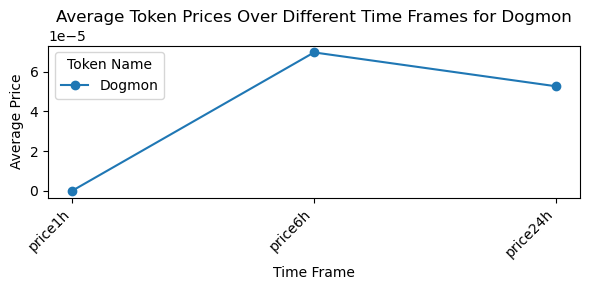

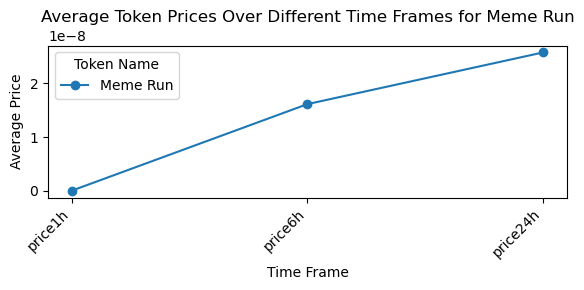

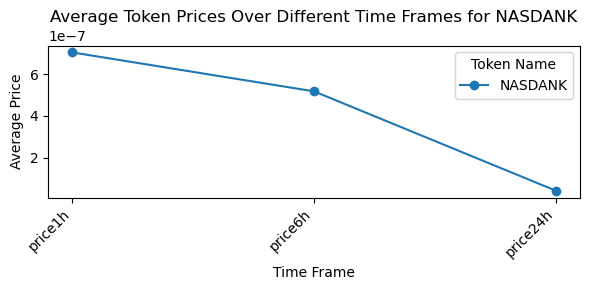

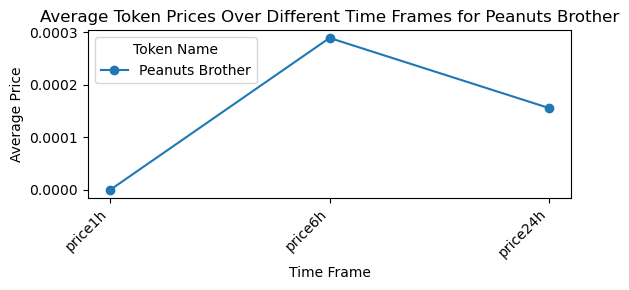

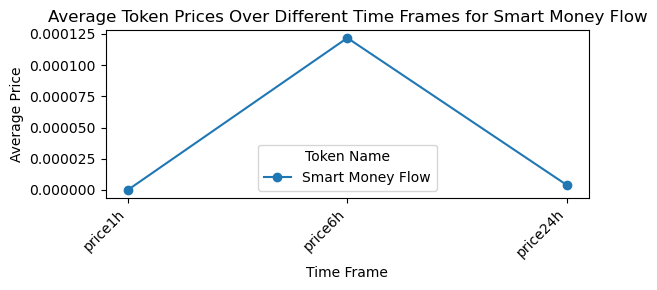

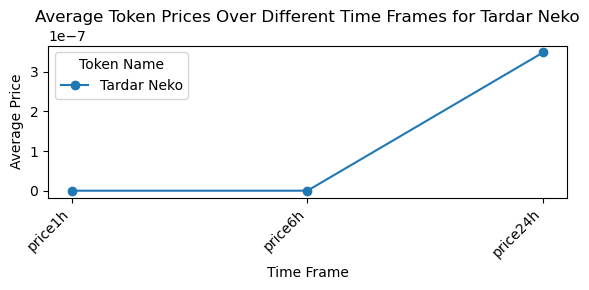

In [13]:
# Data Visualization: Token Prices Over Different Time Frames

# Preparing data for plotting
time_frames = ['price1h', 'price6h', 'price24h']

# Selecting the top 12 tokens with the highest transaction frequency
top_tokens = token_df['tokenName'].value_counts().nlargest(12).index
average_prices = token_df[token_df['tokenName'].isin(top_tokens)].groupby("tokenName")[time_frames].mean()

# Plotting a separate line graph for each token
for token in average_prices.index:
    plt.figure(figsize=(6, 3))  # Make the graph smaller
    plt.plot(time_frames, average_prices.loc[token], marker='o', label=token)
    plt.xlabel('Time Frame')
    plt.ylabel('Average Price')
    plt.title(f'Average Token Prices Over Different Time Frames for {token}')
    plt.xticks(rotation=45, ha='right')  # Adjust label alignment for readability
    plt.legend(title='Token Name')
    plt.tight_layout()
    plt.show()